In [1]:
import os, shutil, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from keras.regularizers import l2
from sklearn.utils import class_weight 

In [2]:
train_dir = 'Human_Face_Regonition_Images\\split2\\train'
validation_dir = 'Human_Face_Regonition_Images\\split2\\validation'
test_dir = 'Human_Face_Regonition_Images\\split2\\test'

In [3]:
train_data_gen_aug = ImageDataGenerator(rescale=1./255, 
                                        rotation_range=30, 
                                        width_shift_range=.2, 
                                        height_shift_range=.2,
                                        zoom_range=0.2)
train_generator_aug = train_data_gen_aug.flow_from_directory(train_dir, target_size=(256, 256), batch_size=128)

validation_data_gen_aug = ImageDataGenerator(rescale=1./255, 
                                        rotation_range=30, 
                                        width_shift_range=.2, 
                                        height_shift_range=.2,
                                        zoom_range=0.2)
validation_generator_aug = validation_data_gen_aug.flow_from_directory(validation_dir, target_size=(256, 256), batch_size=128)

test_data_gen_aug = ImageDataGenerator(rescale=1./255, 
                                        rotation_range=30, 
                                        width_shift_range=.2, 
                                        height_shift_range=.2,
                                        zoom_range=0.2)
test_generator_aug = test_data_gen_aug.flow_from_directory(test_dir, target_size=(256, 256), batch_size=128)

Found 16000 images belonging to 6 classes.
Found 5000 images belonging to 6 classes.
Found 3108 images belonging to 6 classes.


In [4]:
weight = class_weight.compute_class_weight(
           'balanced',
            np.unique(train_generator_aug.classes), 
            train_generator_aug.classes)

train_class_weights = dict(enumerate(weight))
train_class_weights

C:\Users\soohy\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4 5], y=[0 0 0 ... 5 5 5] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{0: 1.1185682326621924,
 1: 4.294149221685454,
 2: 5.698005698005698,
 3: 0.33146882121400456,
 4: 0.9399600516978028,
 5: 1.6210739614994933}

In [5]:
cnn_model_aug6 = models.Sequential()

cnn_model_aug6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug6.add(MaxPooling2D((2, 2)))

cnn_model_aug6.add(Conv2D(64, kernel_size=(3, 3)))
cnn_model_aug6.add(BatchNormalization())
cnn_model_aug6.add(Activation('relu'))

cnn_model_aug6.add(Dropout(0.25))

cnn_model_aug6.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug6.add(MaxPooling2D((2, 2)))

cnn_model_aug6.add(Conv2D(64, kernel_size=(3, 3)))
cnn_model_aug6.add(BatchNormalization())
cnn_model_aug6.add(Activation('relu'))

cnn_model_aug6.add(Dropout(0.25))

cnn_model_aug6.add(Flatten())

cnn_model_aug6.add(Dense(64, activation='relu'))

cnn_model_aug6.add(Dense(32))
cnn_model_aug6.add(BatchNormalization())
cnn_model_aug6.add(Activation('relu'))

cnn_model_aug6.add(Dense(16))
cnn_model_aug6.add(BatchNormalization())
cnn_model_aug6.add(Activation('relu'))

cnn_model_aug6.add(Dense(6, activation='softmax'))

cnn_model_aug6.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy','Recall', 'Precision'])

result = cnn_model_aug6.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,

                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 847s 21s/step - loss: 1.9342 - accuracy: 0.2193 - recall: 0.0205 - precision: 0.3646 - val_loss: 2.4793 - val_accuracy: 0.1825 - val_recall: 0.0894 - val_precision: 0.2294
Epoch 2/15
40/40 [==============================] - 704s 18s/step - loss: 1.6409 - accuracy: 0.3781 - recall: 0.0516 - precision: 0.6183 - val_loss: 2.1078 - val_accuracy: 0.0306 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/15
40/40 [==============================] - 738s 18s/step - loss: 1.4818 - accuracy: 0.4768 - recall: 0.1176 - precision: 0.7041 - val_loss: 1.9068 - val_accuracy: 0.1219 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/15
40/40 [==============================] - 679s 17s/step - loss: 1.3921 - accuracy: 0.5090 - recall: 0.2254 - precision: 0.6849 - val_loss: 1.8852 - val_accuracy: 0.1478 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/15
40/40 [==============================] - 734s 18s/step - loss: 1.3101

In [6]:
cnn_result_train6 = cnn_model_aug6.evaluate(train_generator_aug)
cnn_result_validation6 = cnn_model_aug6.evaluate(validation_generator_aug)
cnn_result_test6 = cnn_model_aug6.evaluate(test_generator_aug)

print(cnn_result_train6, cnn_result_validation6, cnn_result_test6)

25/25 [==============================] - 77s 3s/step - loss: 1.4059 - accuracy: 0.5035 - recall: 0.3317 - precision: 0.6579
[1.4110699892044067, 0.5063750147819519, 0.3309375047683716, 0.6576005816459656] [1.3949819803237915, 0.510200023651123, 0.3386000096797943, 0.6572204828262329] [1.4058600664138794, 0.5035392642021179, 0.3317245841026306, 0.6579450964927673]


In [1]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

names = ['0-11', '12-17', '18-20', '21-40', '41-60', '61+',]

y_pred=cnn_model_aug6.predict(test_generator_aug) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(cnn_model_aug6, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm, names)

import seaborn as sns

CM = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=names, 
           yticklabels=names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

NameError: name 'cnn_model_aug6' is not defined

In [6]:
train_imgs_aug, train_labels_aug = next(train_generator_aug)
validation_imgs_aug, validation_labels_aug = next(validation_generator_aug)
test_imgs_aug, test_labels_aug = next(test_generator_aug)

train_images_aug = train_imgs_aug.reshape(train_imgs_aug.shape[0], -1)
validation_images_aug = validation_imgs_aug.reshape(validation_imgs_aug.shape[0], -1)
test_images_aug = test_imgs_aug.reshape(test_imgs_aug.shape[0], -1)

print(train_images_aug.shape, validation_images_aug.shape, test_images_aug.shape)

(128, 196608) (128, 196608) (128, 196608)


In [20]:
model = models.Sequential()
model.add(Dense(128, activation='relu', input_shape=(196608,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy','Recall', 'Precision'])

result = model.fit(train_images_aug, train_labels_aug,
                    epochs=15,
                    batch_size=64,
                    class_weight=train_class_weights,
                    validation_data=(validation_images_aug, validation_labels_aug))

Epoch 1/15
2/2 [==============================] - 1s 514ms/step - loss: 4.9009 - accuracy: 0.3438 - recall: 0.2031 - precision: 0.4127 - val_loss: 6.9571 - val_accuracy: 0.2031 - val_recall: 0.1797 - val_precision: 0.1983
Epoch 2/15
2/2 [==============================] - 0s 233ms/step - loss: 12.1023 - accuracy: 0.3047 - recall: 0.2969 - precision: 0.3115 - val_loss: 6.5054 - val_accuracy: 0.2500 - val_recall: 0.2500 - val_precision: 0.2500
Epoch 3/15
2/2 [==============================] - 0s 239ms/step - loss: 12.0742 - accuracy: 0.3281 - recall: 0.3281 - precision: 0.3307 - val_loss: 13.7253 - val_accuracy: 0.0234 - val_recall: 0.0234 - val_precision: 0.0234
Epoch 4/15
2/2 [==============================] - 0s 243ms/step - loss: 9.4358 - accuracy: 0.0781 - recall: 0.0781 - precision: 0.0794 - val_loss: 2.9976 - val_accuracy: 0.3750 - val_recall: 0.3047 - val_precision: 0.4149
Epoch 5/15
2/2 [==============================] - 0s 210ms/step - loss: 3.8645 - accuracy: 0.3672 - recall: 0

In [21]:
result_train_aug = model.evaluate(train_images_aug, train_labels_aug)
result_validation_aug = model.evaluate(validation_images_aug, validation_labels_aug)
result_test_aug = model.evaluate(test_images_aug, test_labels_aug)

print(result_train_aug, result_validation_aug, result_test_aug)

4/4 [==============================] - 0s 17ms/step - loss: 2.9804 - accuracy: 0.4531 - recall: 0.4062 - precision: 0.4906
[2.093165874481201, 0.5390625, 0.5078125, 0.5803571343421936] [3.6287107467651367, 0.375, 0.296875, 0.3689320385456085] [2.9803500175476074, 0.453125, 0.40625, 0.49056604504585266]


In [14]:
def plot_loss_accuracy(result):
    history = result.history

    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

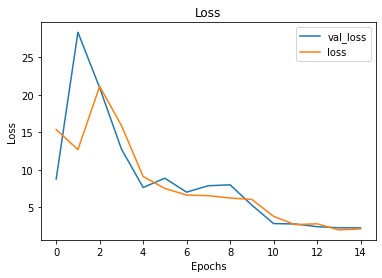

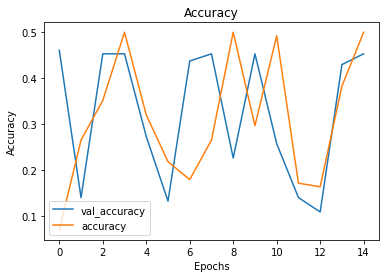

In [15]:
plot_loss_accuracy(result)

In [22]:
models.save_model(model, 'new_baseline_model.h5')

In [24]:
cnn_model_aug = models.Sequential()

cnn_model_aug.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug.add(MaxPooling2D((2, 2)))
cnn_model_aug.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug.add(MaxPooling2D((2, 2)))
cnn_model_aug.add(Dropout(0.25))
cnn_model_aug.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug.add(MaxPooling2D((2, 2)))
cnn_model_aug.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug.add(MaxPooling2D((2, 2)))
cnn_model_aug.add(Dropout(0.25))
cnn_model_aug.add(Flatten())
cnn_model_aug.add(Dense(64, activation='relu'))
cnn_model_aug.add(Dense(32, activation='relu'))
cnn_model_aug.add(Dense(16, activation='relu'))
cnn_model_aug.add(Dense(6, activation='softmax'))

cnn_model_aug.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy','Recall', 'Precision'])

result = cnn_model_aug.fit(train_generator_aug,
                    steps_per_epoch=50,
                    epochs=20,
                    batch_size=64,
                    class_weight=train_class_weights,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/20
50/50 [==============================] - 357s 7s/step - loss: 1.7678 - accuracy: 0.1602 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.7813 - val_accuracy: 0.2494 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/20
50/50 [==============================] - 351s 7s/step - loss: 1.7353 - accuracy: 0.3752 - recall: 4.6875e-04 - precision: 1.0000 - val_loss: 1.6961 - val_accuracy: 0.4000 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/20
50/50 [==============================] - 351s 7s/step - loss: 1.7390 - accuracy: 0.3559 - recall: 0.0077 - precision: 0.5976 - val_loss: 1.6305 - val_accuracy: 0.4409 - val_recall: 0.0113 - val_precision: 0.8571
Epoch 4/20
50/50 [==============================] - 349s 7s/step - loss: 1.6857 - accuracy: 0.3725 - recall: 0.0180 - precision: 0.7012 - val_loss: 1.6790 - val_accuracy: 0.3350 - val_recall: 0.0025 - val_precision: 0.7273
Epoch 5/20
50/50 [==============================] - 340s 7s/step - loss: 1.6355 

In [25]:
cnn_result_train = cnn_model_aug.evaluate(train_generator_aug)
cnn_result_validation = cnn_model_aug.evaluate(validation_generator_aug)
cnn_result_test = cnn_model_aug.evaluate(test_generator_aug)

print(cnn_result_train, cnn_result_validation, cnn_result_test)

25/25 [==============================] - 59s 2s/step - loss: 1.5600 - accuracy: 0.4131 - recall: 0.0190 - precision: 0.5842
[1.554291844367981, 0.4165000021457672, 0.019312499091029167, 0.5786516666412354] [1.5504027605056763, 0.40720000863075256, 0.019999999552965164, 0.5847952961921692] [1.560015082359314, 0.41312742233276367, 0.018983269110322, 0.5841584205627441]


In [14]:
cnn_model_aug2 = models.Sequential()

cnn_model_aug2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug2.add(MaxPooling2D((2, 2)))
cnn_model_aug2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug2.add(MaxPooling2D((2, 2)))
cnn_model_aug2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug2.add(MaxPooling2D((2, 2)))
cnn_model_aug2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug2.add(MaxPooling2D((2, 2)))

cnn_model_aug2.add(Flatten())

cnn_model_aug2.add(Dense(512, activation='relu'))
cnn_model_aug2.add(Dense(6, activation='softmax'))

cnn_model_aug2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy','Recall'])

result = cnn_model_aug2.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    class_weight=train_class_weights,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 280s 7s/step - loss: 1.8231 - accuracy: 0.2674 - recall: 0.0000e+00 - val_loss: 1.7831 - val_accuracy: 0.2206 - val_recall: 0.0000e+00
Epoch 2/15
40/40 [==============================] - 269s 7s/step - loss: 1.7572 - accuracy: 0.3596 - recall: 0.0000e+00 - val_loss: 1.6807 - val_accuracy: 0.4350 - val_recall: 0.0000e+00
Epoch 3/15
40/40 [==============================] - 267s 7s/step - loss: 1.7995 - accuracy: 0.2783 - recall: 0.0000e+00 - val_loss: 1.7550 - val_accuracy: 0.1894 - val_recall: 0.0000e+00
Epoch 4/15
40/40 [==============================] - 264s 7s/step - loss: 1.7146 - accuracy: 0.3041 - recall: 0.0000e+00 - val_loss: 1.6194 - val_accuracy: 0.4178 - val_recall: 6.2500e-04
Epoch 5/15
40/40 [==============================] - 263s 7s/step - loss: 1.6567 - accuracy: 0.3316 - recall: 0.0000e+00 - val_loss: 1.5977 - val_accuracy: 0.4547 - val_recall: 3.1250e-04
Epoch 6/15
40/40 [==============================] - 263s 7s/step 

In [15]:
cnn_result_train2 = cnn_model_aug2.evaluate(train_generator_aug)
cnn_result_validation2 = cnn_model_aug2.evaluate(validation_generator_aug)
cnn_result_test2 = cnn_model_aug2.evaluate(test_generator_aug)

print(cnn_result_train2, cnn_result_validation2, cnn_result_test2)

25/25 [==============================] - 63s 3s/step - loss: 1.6443 - accuracy: 0.3684 - recall: 0.0505
[1.641836166381836, 0.3746874928474426, 0.0546875] [1.652403712272644, 0.36719998717308044, 0.051600001752376556] [1.6443390846252441, 0.3684041202068329, 0.05051480233669281]


In [16]:
cnn_model_aug3 = models.Sequential()

cnn_model_aug3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug3.add(MaxPooling2D((2, 2)))

cnn_model_aug3.add(Conv2D(64, kernel_size=(3, 3)))
cnn_model_aug3.add(BatchNormalization())
cnn_model_aug3.add(Activation('relu'))

cnn_model_aug3.add(Dropout(0.25))

cnn_model_aug3.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug3.add(MaxPooling2D((2, 2)))

cnn_model_aug3.add(Conv2D(64, kernel_size=(3, 3)))
cnn_model_aug3.add(BatchNormalization())
cnn_model_aug3.add(Activation('relu'))

cnn_model_aug3.add(Dropout(0.25))

cnn_model_aug3.add(Flatten())

cnn_model_aug3.add(Dense(64, activation='relu'))

cnn_model_aug3.add(Dense(32))
cnn_model_aug3.add(BatchNormalization())
cnn_model_aug3.add(Activation('relu'))

cnn_model_aug3.add(Dense(16))
cnn_model_aug3.add(BatchNormalization())
cnn_model_aug3.add(Activation('relu'))

cnn_model_aug3.add(Dense(6, activation='softmax'))

cnn_model_aug3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy','Recall', 'Precision'])

result = cnn_model_aug3.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    class_weight=train_class_weights,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 819s 20s/step - loss: 1.8246 - accuracy: 0.2096 - recall: 0.0299 - precision: 0.3964 - val_loss: 2.4327 - val_accuracy: 0.1056 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/15
40/40 [==============================] - 892s 22s/step - loss: 1.7599 - accuracy: 0.2510 - recall: 0.0230 - precision: 0.5930 - val_loss: 2.6285 - val_accuracy: 0.1209 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/15
40/40 [==============================] - 734s 18s/step - loss: 1.6740 - accuracy: 0.3074 - recall: 0.0254 - precision: 0.5778 - val_loss: 2.6830 - val_accuracy: 0.1741 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/15
40/40 [==============================] - 729s 18s/step - loss: 1.7114 - accuracy: 0.3133 - recall: 0.0291 - precision: 0.6395 - val_loss: 2.3115 - val_accuracy: 0.1813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/15
40/40 [==============================] - 748s 19s/step - loss

In [17]:
cnn_result_train3 = cnn_model_aug3.evaluate(train_generator_aug)
cnn_result_validation3 = cnn_model_aug3.evaluate(validation_generator_aug)
cnn_result_test3 = cnn_model_aug3.evaluate(test_generator_aug)

print(cnn_result_train3, cnn_result_validation3, cnn_result_test3)

25/25 [==============================] - 67s 3s/step - loss: 2.9069 - accuracy: 0.1496 - recall: 0.0457 - precision: 0.3242
[2.8919670581817627, 0.14481249451637268, 0.0455624982714653, 0.3538835048675537] [2.922852039337158, 0.14000000059604645, 0.04820000007748604, 0.36131933331489563] [2.906930923461914, 0.1496139019727707, 0.04568854719400406, 0.32420089840888977]
